в данной главе приведены примеры отфильтровывания и формирования импульсов. В них будут использованы символы BPSK, чтобы их было легче визуализировать - перед этапом формирования импульса BPSK включает передачу 1 или -1 с "Q" равным нулю. 

В этой симуляции будут использованы 8 выборок на символ, и вместо использования сигнала в форме прямоугольной волны из 1 и -1, мы используем набор импульсов. Когда импульс прходит через фильтр, выходом является импульсная характеристика.

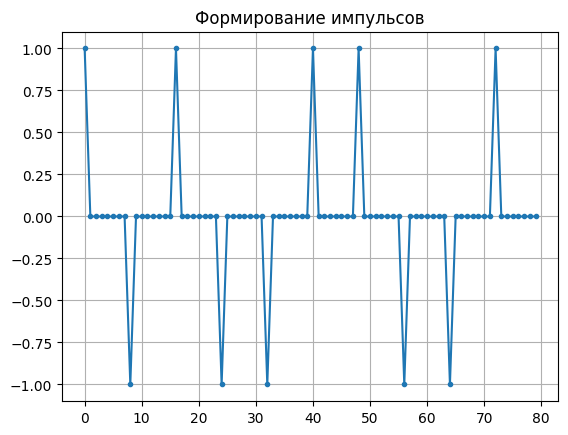

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num_symbols = 10
sps = 8

bits = np.random.randint(0, 2, num_symbols) # Our data to be transmitted, 1's and 0's

#Для каждого бита в массиве bits:
    # Создаем массив нулей длиной 8
    # Устанавливаем первое значение массива pulse равным 1 или -1 в зависимости от значения бита
x = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 
    x = np.concatenate((x, pulse)) 
plt.figure(0)
plt.plot(x, '.-')
plt.grid(True)
plt.title("Формирование импульсов")
plt.show()

В примере создается фильтр приподнятого косинуса, используя значение `бета` = 0,35, и 101 порядка, чтобы дать сигналу достаточно времени для затухания до нуля. 

In [4]:
#bits: [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]
#BPSK symbols: [-1, 1, 1, 1, 1, -1, -1, -1, 1, 1]
#Applying 8 samples per symbol: [-1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...]

# Создание фильтра приподнятого косинуса
num_taps = 101
beta = 0.35
Ts = sps 
t = np.arange(num_taps) - (num_taps-1)//2
h = 1/Ts*np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
plt.figure(1)
plt.plot(t, h, '.')
plt.grid(True)
plt.title("Импульсная характеристика")
plt.show()

Можно заметить, что выходной сигнал спадает до нуля. Тот факт, что мы используем 8 выборок на символ, определяет, насколько узким будет этот фильтр и насколько быстро он затухает до нуля. 

Следующий код можно описать как:
1. Фильтруем наш сигнал, чтобы применить формирование импульса.
2. Строим график, который представляет собой отфильтрованный сигнал.
3. Для каждого символа в диапазоне ``num_symbols` мы добавляем вертикальные линии на графике, чтобы показать, какие части сигнала были использованы для формирования импульса.

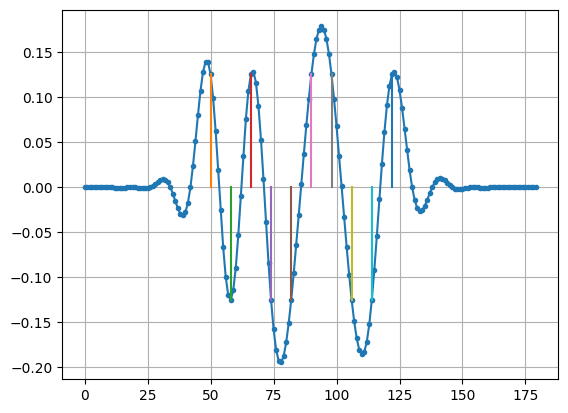

In [5]:

x_shaped = np.convolve(x, h)
plt.figure(2)
plt.plot(x_shaped, '.-')
for i in range(num_symbols):
    plt.plot([i*sps+num_taps//2,i*sps+num_taps//2], [0, x_shaped[i*sps+num_taps//2]])
plt.grid(True)
plt.show()

Вертикальные линии были созданы в цикле for для наглядности. Они предназначены для демонстрации того, где этот сигнал будет дискретизироваться приемником. 